In [1]:
import numpy as np, scipy, astropy
import matplotlib.pyplot as pl
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import scipy.constants as const
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
cont_ra, cont_temp = np.loadtxt("continuum.dat", unpack = 1)

In [3]:
def gaussian(x, a, b, c):
    
    return a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

popt, pconv = curve_fit(gaussian, cont_ra, cont_temp, p0 = (1.1, 283, 0.01))

print(popt)
print(np.diag(pconv) ** 2)

hpbw = 2.355 * popt[2] #Degrees

[1.12382286e+00 2.82987607e+02 9.90008731e-03]
[3.28361847e-08 3.57566285e-16 3.54239055e-16]


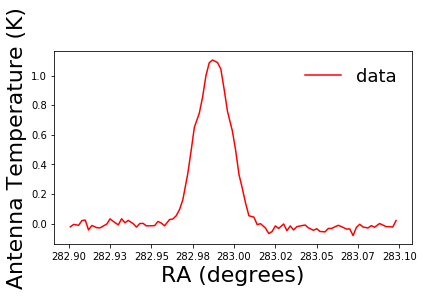

In [4]:
fig, ax = pl.subplots()

ax.plot(cont_ra, cont_temp, color = 'r', label = 'data')
#ax.plot(cont_ra, gaussian(cont_ra, *popt), color = 'g', label = 'fit')

ax.set_xlabel(r"RA (degrees)", fontsize = 22)
ax.set_ylabel(r"Antenna Temperature (K)", fontsize = 22)

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax.legend(loc = 'best', frameon = False, fontsize = 18)

fig.tight_layout()

pl.savefig("continuum_scan.pdf")
pl.show()

<IPython.core.display.Javascript object>


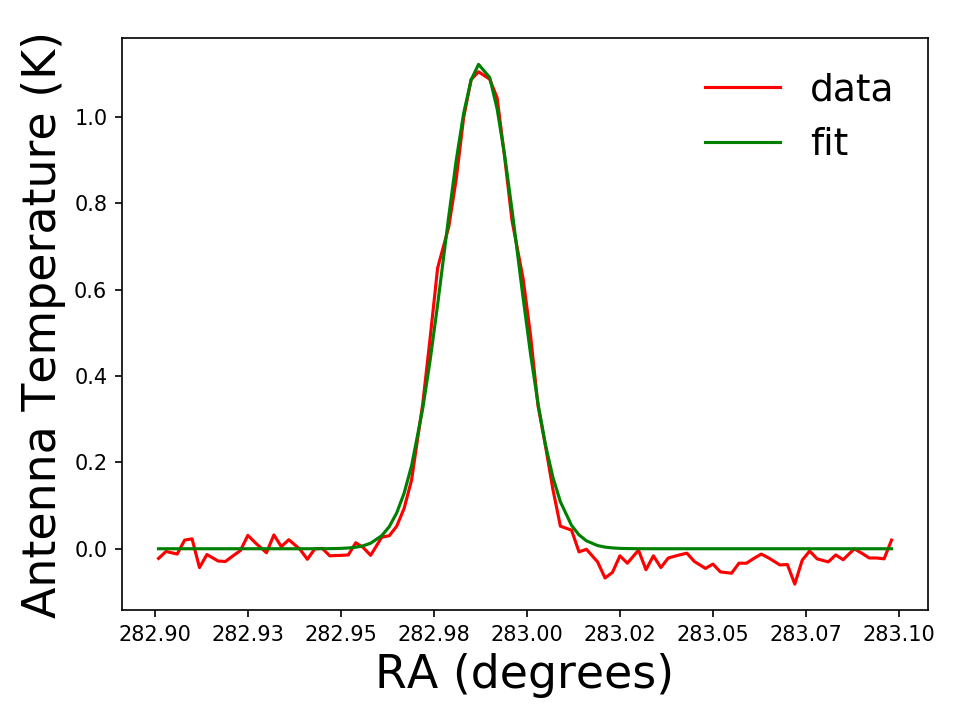

In [7]:
fig, ax = pl.subplots()

ax.plot(cont_ra, cont_temp, color = 'r', label = 'data')
ax.plot(cont_ra, gaussian(cont_ra, *popt), color = 'g', label = 'fit')

ax.set_xlabel(r"RA (degrees)", fontsize = 22)
ax.set_ylabel(r"Antenna Temperature (K)", fontsize = 22)

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

ax.legend(loc = 'best', frameon = False, fontsize = 18)

fig.tight_layout()

pl.savefig("continuum_fit.pdf")
pl.show()

In [8]:
#Calculate the effective area and aperture efficiency

nu_c = 9e9 #Hz
D_eff = const.c / (nu_c * hpbw * np.pi / 180)

beam_solid_angle = 1.133 * (hpbw * np.pi / 180) ** 2

A_eff = np.pi * (D_eff / 2) ** 2

A_geom = np.pi * (100 / 2) ** 2

efficiency = A_eff / A_geom

print "Efficiency:", efficiency
print "Effective Area:", A_eff, r"m$^2$"
print "Beam solid angle:", beam_solid_angle

Efficiency: 0.6701033345215834
Effective Area: 5262.979282197575 m$^2$
Beam solid angle: 1.8760504703865438e-07
